# Kullback-Leibler Divergence and Jensen-Shannon Divergence

KL Divergence calculates a value, in bits, that represents how much information required to represent the differences between two probability distributions

## Statistical Distance

Statistical distance is a concept used to quantify the difference between statistical objects, such as probability distributions for a random variable.

This is about comparing the entire probability distribution in terms of shape, not just comparing the mean or variance of the distribution.
### Applications of Statistical Distances and Divergence Measures

There are various situations where statistical distances and divergence measures, such as Kullback-Leibler Divergence (KL Divergence) and Jensen-Shannon Divergence, are commonly used:

1. **Comparing Probability Distributions:**
   - Evaluate the difference between two probability distributions, like a true distribution and an approximation. This is crucial for understanding how well an approximation matches the true distribution.

2. **Model Evaluation:**
   - Assess the performance of machine learning models by comparing predicted and actual probability distributions. Statistical distances provide insights into the accuracy and generalization of models.

3. **Information Gain and Mutual Information:**
   - Serve as the foundation for calculating information gain and mutual information. These measures are essential for feature selection, identifying informative features for building robust models.

4. **Loss Functions for Classification Models:**
   - Cross-entropy, derived from KL Divergence, is a commonly used loss function for classification models. It measures the difference between predicted and true distributions, guiding the model towards better predictions.

5. **Generative Adversarial Networks (GANs):**
   - Play a role in training GANs to approximate target probability distributions. Divergence scores are used in optimizing the generator to produce distributions similar to the target.

6. **Understanding Complex Modeling Problems:**
   - Valuable tools for gaining insights into complex modeling problems, helping understand how well a model approximates a target distribution and guiding the optimization process.


## Kullback-Leibler Divergence

Kullback-Leibler Divergence (KL Divergence) calculates a score that measures the divergence of one probability distribution (P) from another (Q). It is denoted as KL(P || Q) and is not symmetric. Where the “||” operator indicates “divergence” or Ps divergence from Q. KL Divergence is always non-negative and becomes zero if and only if P and Q are identical.

KL divergence can be calculated as the negative sum of probability of each event in P multiplied by the log of the probability of the event in Q over the probability of the event in P.

KL(P || Q) = sum x in X P(x) * log(P(x) / Q(x))

The log can be base-2 to give units in “bits,” or the natural logarithm base-e with units in “nats.” When the score is 0, it suggests that both distributions are identical, otherwise the score is positive. When KL Divergence is calculated with a logarithmic base of 2, the resulting unit is in "bits."
This means that the score obtained from KL Divergence, when expressed in bits, represents the amount of additional information needed to encode events from one distribution using an optimal code based on the other distribution.

The intuition for the KL divergence score is that when the probability for an event from P is large, but the probability for the same event in Q is small, there is a large divergence. When the probability from P is small and the probability from Q is large, there is also a large divergence, but not as large as the first case.

## Jensen-Shannon Divergence

Jensen-Shannon Divergence is an extension of KL Divergence that provides a normalized and symmetrical version. It calculates a score and distance measure between two probability distributions in a symmetrical way. It is defined as the average of the KL Divergence between P and the average of P and Q.

## Applications

- KL Divergence and Jensen-Shannon Divergence find applications in machine learning.
- They are used to calculate the difference between an actual and observed probability distribution, valuable in tasks like model evaluation and feature selection.
- KL Divergence is a key concept in information theory and is used in various fields where probability distributions are compared.

Understanding these measures is crucial for tasks involving the comparison of probability distributions, helping in assessing the similarity or dissimilarity between different sets of data.

## Differences between KL Divergence and Cross-Entropy
### Cross Entropy and KL Divergence
cross entropy is focused on the distribution of the labels which kl divergence is focused on the entire distribution

#### Cross Entropy (H(P, Q))
Cross entropy is a measure of how well one probability distribution predicts a set of events from another distribution. In the context of machine learning it is how well the model's predicted probability distribution aligns with the true distribution of the labels. Cross entropy is primarily focused on measuring the dissimilarity or difference between two probability distributions over the same events, with a particular emphasis on the distribution of the labels. For two probability distributions P and Q, the cross entropy from P to Q is given by the formula:

\[ H(P, Q) = -\sum_{i} P(i) \log(Q(i)) \]

It quantifies the average number of bits needed to encode events from P when using the optimal code based on Q. Cross entropy is always non-negative and is minimized when P and Q are the same.

#### KL Divergence (\(D_{KL}(P \,||\, Q)\))
Kullback-Leibler (KL) divergence is a broader concept that measures the information lost when one probability distribution is used to approximate another. It quantifies the extra amount of information needed to represent events from one distribution when using the optimal code based on another distribution. In the context of probability distributions associated with machine learning, KL divergence can be used to assess how one distribution diverges from another, considering the entire distribution.

<b>KL divergence measures the information lost when using Q to approximate P. It quantifies the difference between two probability distributions P and Q.</b>

\[ D_{KL}(P \,||\, Q) = \sum_{i} P(i) \log\left(\frac{P(i)}{Q(i)}\right) \]

It represents the extra amount of information needed to encode events from P when using the code based on Q instead of the optimal code for P. KL divergence is not symmetric (\(D_{KL}(P \,||\, Q) \neq D_{KL}(Q \,||\, P)\)).

#### Relationship

Cross entropy includes both the entropy of the true distribution P and the KL divergence between P and Q:

\[ H(P, Q) = H(P) + D_{KL}(P \,||\, Q) \]

The entropy term H(P) is a constant for a given true distribution and does not depend on the predicted distribution Q.


### References
https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-understanding-kl-divergence-2b382ca2b2a8

https://machinelearningmastery.com/divergence-between-probability-distributions/

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

import torch.nn.functional as F
from typing import List, Tuple, Dict, Any, Optional, Union

### What is information Entropy?

Quantifying information is the foundation of the field of information theory.

The intuition behind quantifying information is the idea of measuring how much surprise there is in an event. Those events that are rare (low probability) are more surprising and therefore have more information than those events that are common (high probability).

Low Probability Event: High Information (surprising).
High Probability Event: Low Information (unsurprising).

Rare events are more uncertain or more surprising and require more information to represent them than common events.

In [2]:
def get_shannon_information(p: float) -> float:
    h = -np.log2(p)
    return h

# probability of getting heads in a fair coin toss: p = 0.5
p = 0.5
print(f'p(x)={p:.3f}, information: {get_shannon_information(p):.3f} bits')

# probability of getting heads in a biased coin toss: p = 0.9
p = 0.9
print(f'p(x)={p:.3f}, information: {get_shannon_information(p):.3f} bits')

# probability of getting heads in a biased coin toss: p = 0.1
p = 0.1
print(f'p(x)={p:.3f}, information: {get_shannon_information(p):.3f} bits')

# probability of rolling a 6 on a fair die: p = 1/6
p = 1/6
print(f'p(x)={p:.3f}, information: {get_shannon_information(p):.3f} bits')

print('Events that are more likely to happen have less information, and events that are less likely to happen have more information.')

p(x)=0.500, information: 1.000 bits
p(x)=0.900, information: 0.152 bits
p(x)=0.100, information: 3.322 bits
p(x)=0.167, information: 2.585 bits
Events that are more likely to happen have less information, and events that are less likely to happen have more information.


### Back to Kl Divergence

In [3]:
events = ['red', 'green', 'blue']
target_probability_distribution = [0.10, 0.40, 0.50]
p = torch.tensor(target_probability_distribution)
approximation_probability_distribution = [0.80, 0.15, 0.05]
q = torch.tensor(approximation_probability_distribution)
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))

P=1.000 Q=1.000


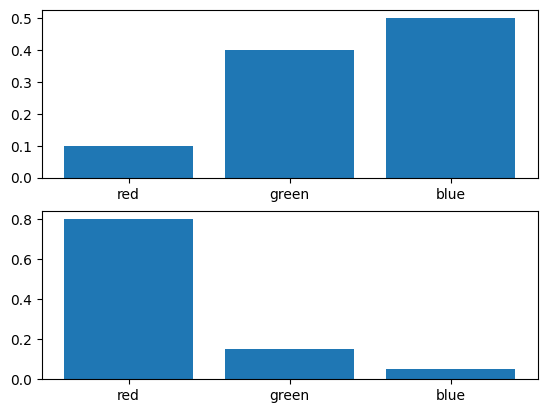

In [4]:
# plot first distribution
plt.subplot(2,1,1)
plt.bar(events, p)
# plot second distribution
plt.subplot(2,1,2)
plt.bar(events, q)
# show the plot
plt.show()

In [5]:
def kl_divergence_bits(p:torch.Tensor, q:torch.Tensor) -> float:
    """
    Calculates the Kullback-Leibler (KL) divergence between two probability distributions
    """

    # Avoiding division by zero by adding a small epsilon
    epsilon = 1e-10
    
    # Calculate KL Divergence using NumPy functions
    kl_divergence = torch.sum(p * torch.log2((p + epsilon) / (q + epsilon)))
    
    return kl_divergence

def kl_divergence_nats(p:torch.Tensor, q:torch.Tensor) -> float:
    """
    Calculates the Kullback-Leibler (KL) divergence between two probability distributions
    """
    
    # Avoiding division by zero by adding a small epsilon
    epsilon = 1e-10
    
    # Calculate KL Divergence using NumPy functions
    kl_divergence = torch.sum(p * torch.log((p + epsilon) / (q + epsilon)))
    
    return kl_divergence

In [6]:
# calculate (P || Q)
kl_pq = kl_divergence_bits(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence_bits(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 1.927 bits
KL(Q || P): 2.022 bits


In [7]:
# calculate (P || Q)
kl_pq = kl_divergence_nats(p, q)
print('KL(P || Q): %.3f nats' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence_nats(q, p)
print('KL(Q || P): %.3f nats' % kl_qp)

KL(P || Q): 1.336 nats
KL(Q || P): 1.401 nats


### Jensen-Shannon Divergence

The Jensen-Shannon divergence (JS divergence) is a measure of difference or similarity between two probability distributions. It provides a symmetrical and normalized score, making it more practical for comparisons.

### Calculation Formula

The JS divergence between distributions P and Q is calculated as:

\[ JS(P || Q) = \frac{1}{2} \cdot KL(P || M) + \frac{1}{2} \cdot KL(Q || M) \]

Where \( M = \frac{1}{2} \cdot (P + Q) \), and \( KL() \) is the Kullback-Leibler divergence.

### Properties

- Symmetry: \( JS(P || Q) = JS(Q || P) \)
- Normalization: Scores range from 0 (identical) to 1 (maximally different) when using the base-2 logarithm.

### Jensen-Shannon Distance

Taking the square root of the JS divergence score gives the Jensen-Shannon distance, denoted as JS distance.

### Example

A function to calculate JS divergence can be defined, utilizing the previously prepared kl_divergence() function.

```python
def js_divergence(p, q):
    M = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, M) + 0.5 * kl_divergence(q, M)


In [8]:
def js_divergence(p: torch.Tensor, q: torch.Tensor) -> float:
    """
    Calculates the Jensen-Shannon (JS) divergence between two probability distributions

    :param p: True probability distribution
    :type p: List[float]
    :param q: Approximation probability distribution
    :type q: List[float]
    :return: Statistical distance between two probability distributions
    :rtype: float
    """
    # Calculate JS Divergence using PyTorch functions
    m_tensor = 0.5 * (p + q)
    js_divergence = 0.5 * kl_divergence_bits(p, m_tensor) + 0.5 * kl_divergence_bits(q, m_tensor)
    
    return js_divergence  # Convert result to Python float

In [9]:
# calculate JS(P || Q)
js_pq = js_divergence(p, q)
print('JS(P || Q) divergence: %.3f bits' % js_pq)

JS(P || Q) divergence: 0.420 bits


In [10]:
# calculate JS(Q || P)
js_qp = js_divergence(q, p)
print('JS(Q || P) divergence: %.3f bits' % js_qp)

JS(Q || P) divergence: 0.420 bits


### Example as a loss function

In [16]:
# def kl_divergence_torch(p:torch.Tensor, q:torch.Tensor) -> float:
#     """
#     Calculation of KL divergence using PyTorch functions
#     """
#     eps = 1e-10
#     p_log = torch.log(p + eps)
#     q_log = torch.log(q + eps)
#     loss = (p * (p_log - q_log))
#     loss = loss.sum() / p.size(0)
#     return loss

def kl_divergence_torch(input, target, reduction='batchmean', log_target=False):
    # Avoiding underflow issues by adding a small epsilon
    epsilon = 1e-10

    if not log_target:
        # Compute KL divergence pointwise
        loss_pointwise = target * (target.log() - input)
    else:
        # Compute KL divergence pointwise with log_target=True
        loss_pointwise = target.exp() * (target - input)

    # Apply reduction
    if reduction == 'mean':
        loss = loss_pointwise.mean()
    elif reduction == 'batchmean':
        loss = loss_pointwise.sum() / input.size(0)
    elif reduction == 'sum':
        loss = loss_pointwise.sum()
    else:  # reduction == 'none'
        loss = loss_pointwise

    return loss

In [24]:
# calculate (P || Q)
kl_pq = kl_divergence_torch(p , q, log_target=True)
print('KL(P || Q): %.3f nats' % kl_pq)

KL(P || Q): 0.265 nats


In [23]:
kl_loss = F.kl_div(p, q, reduction='batchmean', log_target=True)
print('KL(P || Q) divergence: %.3f bits' % kl_loss)

KL(P || Q) divergence: 0.265 bits


In [ ]:
# # It should be implemented as follows:
# outputs = model(x)
# targets_log = torch.og(targets + 1e-10)
# loss = F.kl_div(outputs, targets_log, reduction='batchmean')
# kl_loss.backward
# optimizer.step()